Thomas kitaba


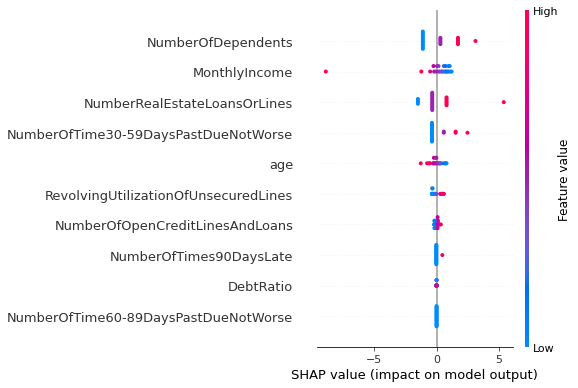

**********************************************
-------------------LIME----------------------------------

LIME text explanation for Linear Regression
Predicted class: 0
Predicted probabilities: [0.96521196 0.03478804]

Feature contributions (feature importance):
NumberOfTime30-59DaysPastDueNotWorse <= -0.33: -0.12
MonthlyIncome > 0.94: -0.11
0.04 < NumberRealEstateLoansOrLines <= 1.02: 0.07
-0.89 < RevolvingUtilizationOfUnsecuredLines <= -0.37: -0.03
-0.64 < NumberOfDependents <= 1.11: -0.02
NumberOfOpenCreditLinesAndLoans > 1.10: 0.02
NumberOfTimes90DaysLate <= -0.21: -0.01
0.05 < age <= 0.37: -0.01
DebtRatio <= -0.29: -0.00
NumberOfTime60-89DaysPastDueNotWorse <= -0.24: 0.00


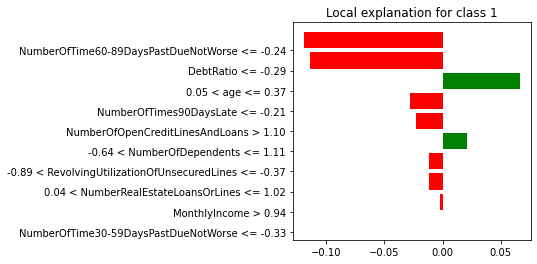

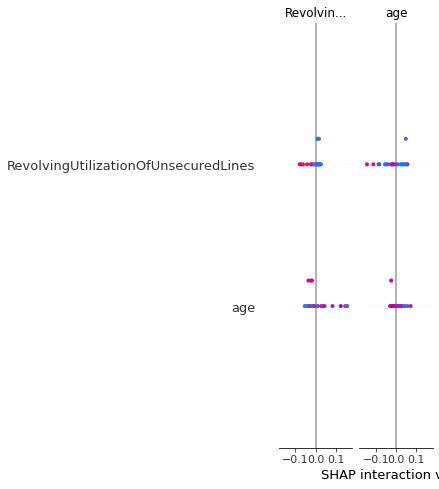

**********************************************
-------------------LIME----------------------------------

LIME text explanation for Random Forest
Predicted class: 0
Predicted probabilities: [0.9 0.1]

Feature contributions (feature importance):
0.04 < NumberRealEstateLoansOrLines <= 1.02: 0.06
NumberOfTime30-59DaysPastDueNotWorse <= -0.33: -0.06
0.05 < age <= 0.37: -0.04
NumberOfOpenCreditLinesAndLoans > 1.10: 0.04
-0.89 < RevolvingUtilizationOfUnsecuredLines <= -0.37: -0.03
-0.64 < NumberOfDependents <= 1.11: -0.03
MonthlyIncome > 0.94: -0.03
DebtRatio <= -0.29: -0.02
NumberOfTimes90DaysLate <= -0.21: -0.01
NumberOfTime60-89DaysPastDueNotWorse <= -0.24: 0.00


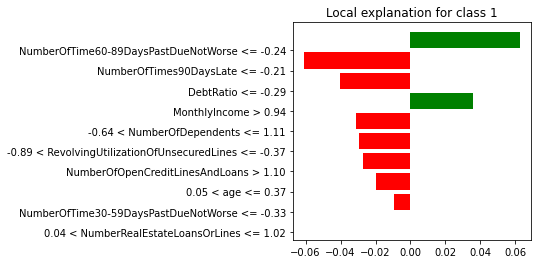

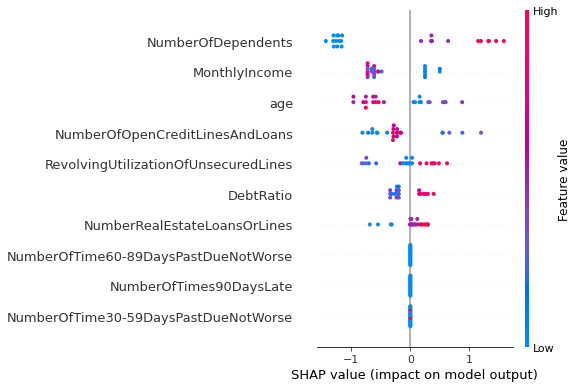

**********************************************
-------------------LIME----------------------------------

LIME text explanation for Gradient Boost
Predicted class: 0
Predicted probabilities: [0.99398315 0.00601686]

Feature contributions (feature importance):
0.04 < NumberRealEstateLoansOrLines <= 1.02: 0.03
0.05 < age <= 0.37: -0.02
MonthlyIncome > 0.94: -0.02
-0.64 < NumberOfDependents <= 1.11: 0.02
-0.89 < RevolvingUtilizationOfUnsecuredLines <= -0.37: -0.01
DebtRatio <= -0.29: -0.01
NumberOfTimes90DaysLate <= -0.21: -0.00
NumberOfTime30-59DaysPastDueNotWorse <= -0.33: -0.00
NumberOfOpenCreditLinesAndLoans > 1.10: -0.00
NumberOfTime60-89DaysPastDueNotWorse <= -0.24: 0.00


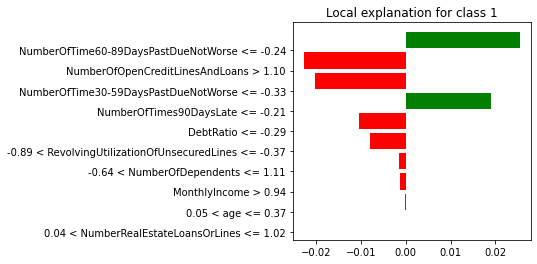

In [6]:
#!/usr/bin/python3

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import lime.lime_tabular, shap, dice_ml 

import matplotlib.pyplot as plt

# from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_classification


def shap_xai(model_evaluation_list):
    model, X_test, y_test, model_name = model_evaluation_list
    explainer = None
    if model_name == "Linear Regression":
        explainer = shap.LinearExplainer(model, X_test)
    if model_name == "Random Forest":
        explainer = shap.TreeExplainer(model)
    if model_name == "Gradient Boost":
        explainer = shap.TreeExplainer(model)
        
    # Compute contriution of each feature to the models prediction
    shap_values = explainer.shap_values(X_test)
    # feature_names = [f'Feature_{i}' for i in range(X_test.shape[1])]
    feature_names = [
    "RevUtil",      # RevolvingUtilizationOfUnsecuredLines
    "Age",          # age
    "PastDue30_59", # NumberOfTime30-59DaysPastDueNotWorse
    "DebtRatio",    # DebtRatio
    "Income",       # MonthlyIncome
    "OpenCredits",  # NumberOfOpenCreditLinesAndLoans
    "Late90",       # NumberOfTimes90DaysLate
    "RELoans",      # NumberRealEstateLoansOrLines
    "PastDue60_89", # NumberOfTime60-89DaysPastDueNotWorse
    "Dependents"    # NumberOfDependents
]
    df_original = pd.read_csv('cs-training.csv')
    feature_names = df_original.columns[:-1].tolist()
    
    # X_train = pd.DataFrame(X_train, columns=feature_names)
    X_test = pd.DataFrame(X_test, columns=feature_names)
    # Visualize Feature importance
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)
    
def lime_xai(model_evaluation_list):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import lime.lime_tabular

    # Unpack the model and test data.
    model, X_test, y_test, model_name = model_evaluation_list

    # Load feature names from the original dataset.
    df_original = pd.read_csv('cs-training.csv')
    feature_names = df_original.columns[:-1].tolist()  # Exclude the target column

    # Convert test data to NumPy array (LIME requires it)
    X_test = np.array(X_test)

    # Initialize the LIME explainer.
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_test, 
        feature_names=feature_names,  # Use actual feature names
        mode="classification"
    )

    # Select the first instance from X_test.
    instance = X_test[0]

    print("**********************************************")

    # Generate the LIME explanation for the selected instance.
    exp = explainer.explain_instance(
        instance,            # Instance to explain.
        model.predict_proba, # Function to get model's probability predictions.
        num_features=len(feature_names)       # Number of features to display in the explanation.
    )

    # Get the predicted class from the explanation.
    predicted_class = np.argmax(exp.predict_proba)

    # Print explanation details.
    print("-------------------LIME----------------------------------")
    print(f"\nLIME text explanation for {model_name}")
    print("Predicted class:", predicted_class)
    print("Predicted probabilities:", exp.predict_proba)

    print("\nFeature contributions (feature importance):")
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.2f}")

    # --- Modify the Plot to Display Feature Names on the y-axis ---
    fig = exp.as_pyplot_figure()
    ax = fig.gca()
    plt.subplots_adjust(left=0.35)

    # Get explanation feature names from LIME
    explanation_list = exp.as_list()
    feature_labels = [item[0] for item in explanation_list]  # Get feature labels
    
    # Set y-axis labels correctly
    ax.set_yticks(range(len(feature_labels)))
    ax.set_yticklabels(feature_labels)
    
    plt.show()

    # # To have more control over the visuslization use this Create a Matplotlib visualization
    # explanation_data = exp.as_list()  # Get explanation as a list of (feature, weight) tuples
    # plt.figure(figsize=(10, 6))  # Set figure size
    # features, weights = zip(*explanation_data)  # Unpack features and weights
    # colors = ['green' if w > 0 else 'red' for w in weights]  # Color code positive/negative contributions
    # # Plot the feature weights
    # plt.barh(features, weights, color=colors)
    # plt.xlabel('Weight (Contribution to Prediction)')  # Label for x-axis
    # plt.ylabel('Features')  # Label for y-axis
    # plt.title('LIME Explanation for Instance Prediction')  # Title of the plot
    # plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
    # # Show the plot
    # plt.tight_layout()
    # plt.show()

def dice_xai(model_evaluation_list):
    # Unpack the model and test data.
    model, X_test, y_test, model_name = model_evaluation_list   
    
    import pandas as pd
    from sklearn.impute import SimpleImputer
    import dice_ml
    
    # --- Automatically Retrieve Feature Names from CSV ---
    # Read the CSV to get the original column names.
    df_original = pd.read_csv('cs-training.csv')
    # Assume that all columns except the last one are features.
    feature_names = df_original.columns[:-1].tolist()
    # The target column is assumed to be the last column.
    target_name = df_original.columns[-1]
    
    # --- Prepare the DataFrame ---
    # Create a DataFrame from X_test using the automatically retrieved feature names.
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    # Add the target column using y_test.
    X_test_df[target_name] = y_test
    
    # Print missing values before cleaning.
    print("Missing values in dataset:\n", X_test_df.isnull().sum())
    
    # Drop rows where the target is missing.
    X_test_df = X_test_df.dropna(subset=[target_name])
    
    # Impute missing feature values using the mean strategy.
    imputer = SimpleImputer(strategy="mean")
    X_test_df[feature_names] = imputer.fit_transform(X_test_df[feature_names])
    
    # Verify that there are no missing values after cleaning.
    print("Missing values in dataset after cleaning:\n", X_test_df.isnull().sum())
    
    # --- Create the DiCE Data and Model Objects ---
    # Create the DiCE data object. DiCE needs the full dataset (features and outcome)
    # to learn feature ranges.
    d = dice_ml.Data(
         dataframe=X_test_df,
         continuous_features=feature_names,
         outcome_name=target_name
    )
    
    # Create the DiCE model object using the provided model and the 'sklearn' backend.
    m = dice_ml.Model(model=model, backend="sklearn")
    
    # Create the DiCE explainer.
    exp = dice_ml.Dice(d, m)
    
    # --- Select a Query Instance ---
    # IMPORTANT: DiCE expects the query instance to contain only the features.
    # Here we select the first instance and drop the target column.
    instance = X_test_df.iloc[[0]].drop(target_name, axis=1)
    
    print("**********************************************")
    if model_name == "Linear Regression":
        print("\nDiCE explanation for Linear Regression")
    elif model_name == "Random Forest":
        print("\nDiCE explanation for Random Forest")
    elif model_name == "Gradient Boost":
        print("\nDiCE explanation for Gradient Boost")
    
    # --- Generate Counterfactual Explanations ---
    try:
        generated_explanation = exp.generate_counterfactuals(
            query_instances=instance,  # Note: parameter name is plural!
            total_CFs=4,               # Generate 4 counterfactuals.
            desired_class=1,           # Change the prediction to class 1.
            features_to_vary="all"     # Allow all features to vary.
        )
    except Exception as e:
        print("Error generating counterfactuals:", e)
        return
    
    # --- Visualize the Generated Counterfactuals ---
    try:
        generated_explanation.visualize_as_dataframe()
    except Exception as e:
        print("Error visualizing counterfactuals:", e)

def model_evaluation(model_evaluation_list):
    model, X_test, y_test, model_name = model_evaluation_list
    result = {}
    
    # Start testing and Evaluation
    model_predicted = model.predict(X_test)
    model_predicted_prob = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC-AUC

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, model_predicted)
    F1_score = f1_score(y_test, model_predicted)
    Precision_score = precision_score(y_test, model_predicted)
    Recall_score = recall_score(y_test, model_predicted)
    
    Roc_auc_score = roc_auc_score(y_test, model_predicted_prob)
    result["model_name"] = f"{model_name}"
    result["accuracy"] = accuracy
    result["f1_score"] = F1_score
    result["precision_score"] = Precision_score
    result["recall_score"] = Recall_score
    result["roc_auc_score"] = Roc_auc_score
    return result
    
def linear_regression(X_train, y_train):
    """
    train and test dataset using linear regression learning model
    X_train: training data
    y_train: target data
    """
    result = []
    # Chose Model
    lgr_model = LogisticRegression(max_iter=500)
    # Start Training
    lgr_model.fit(X_train, y_train)
    return lgr_model

def random_forest(X_train, y_train):
    """
    Train and test dataset using Random Forest learning model
    X_train: training data
    y_train: target data
    """
    # Chose Model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #n_estiators = number of trees, randome_state = for reprocuction
    # Start Training
    rf_model.fit(X_train, y_train)
    return rf_model  # This is the trained model
    
def gradient_boost(X_train, y_train):
    """
    Train and test dataset using Gradient Boosting learning model
    X_train: training data
    y_train: target data
    """
    # Chose Model
    gb_model = XGBClassifier(eval_metric="logloss") #
    # Start Training
    gb_model.fit(X_train, y_train)
    # Start Testing
    return gb_model

if __name__ == "__main__":
    print("Thomas kitaba")
   
    # Sample Data for test
    # np.random.seed(42)
    # X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
    #                        n_redundant=5, n_clusters_per_class=2, random_state=42)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Use CSV Data Only ---
    df = pd.read_csv('cs-training.csv')

    # Separate features and labels
    X = df.iloc[:, :-1]  # All columns except the last one are features
    y = df.iloc[:, -1]   # The last column is the target label

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data (to avoid convergence issues)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    #initialize an empty list to hold the three trained models
    model_evaluation_list = []
    
    # Train model using Linear Regression
    model_evaluation_list.append([linear_regression(X_train, y_train), X_test, y_test, "Linear Regression"]) # recive only model name

    # Train Model Using Randome Forest
    model_evaluation_list.append([random_forest(X_train, y_train), X_test, y_test, "Random Forest"]) # recive only model name
    
    # Train model using Gradient boost
    model_evaluation_list.append([gradient_boost(X_train, y_train), X_test, y_test, "Gradient Boost"])
    
    for model in model_evaluation_list:
        model_evaluation_results = model_evaluation(model)
        # print("-------------------Evaluation Matric----------------------------------")
        # print(model_evaluation_results)
        shap_xai(model)
        lime_xai(model)
        # dice_xai(model)
        print("===========================================")
        
    
